# Setup

In [6]:
# Connecting google drive to Colab to import data
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Import Pandas and define dataframe as df
import pandas as pd
path = "/content/fullListingsRiga.csv"
df = pd.read_csv(path)

In [9]:
# Import other libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Cleaning

##Verify Data

In [10]:
# Check the size of data (Rows,columns)
# Total number of listings in Riga
df.shape

(2801, 75)

In [11]:
# Display all the columns
pd.set_option('display.max_columns', None)
df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21134,https://www.airbnb.com/rooms/21134,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.75 · 1 bedroom · 1 be...,Cozy room in a shared flat with to other peopl...,"The flat is in the urban, a bit bohemian centr...",https://a0.muscache.com/pictures/1850842/2a1b8...,80446,https://www.airbnb.com/users/show/80446,Ieva And Florian Daniel,2010-02-12,"Riga, Latvia",Journalist and Graphic Designer.,within a day,75%,50%,NaN,https://a0.muscache.com/im/users/80446/profile...,https://a0.muscache.com/im/users/80446/profile...,NaN,2.0,2.0,"['email', 'phone']",t,t,"Riga, Latvia",Avoti,NaN,56.95296,24.13101,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.0,"[""City skyline view"", ""Indoor fireplace"", ""Bed...",$10.00,90,1125,90,90,1125,1125,90.0,1125.0,NaN,t,22,52,82,263,2023-06-29,74,0,0,2011-07-24,2021-10-31,4.75,4.62,4.79,4.94,4.90,4.58,4.83,NaN,f,2,0,2,0,0.51
1,120480,https://www.airbnb.com/rooms/120480,20230629191658,2023-06-29,city scrape,Rental unit in Riga · ★4.58 · 2 bedrooms · 2 b...,"Apartment ""Magic of Riga History"" is ideal for...",NaN,https://a0.muscache.com/pictures/1858364/affbf...,606352,https://www.airbnb.com/users/show/606352,Kristine,2011-05-20,"Riga, Latvia","I'm Kristine Rubene from Riga, Latvia. I am w...",within a few hours,100%,98%,t,https://a0.muscache.com/im/pictures/user/e9379...,https://a0.muscache.com/im/pictures/user/e9379...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,VecpilsÄta,NaN,56.95280,24.10551,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Pets allowed"", ""Indoor fireplace: wood-burni...",$56.00,2,730,2,2,730,730,2.0,730.0,NaN,t,5,14,32,304,2023-06-29,533,65,6,2011-06-23,2023-06-22,4.58,4.76,4.58,4.87,4.89,4.94,4.76,NaN,f,1,1,0,0,3.64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2801 non-null   int64  
 1   listing_url                                   2801 non-null   object 
 2   scrape_id                                     2801 non-null   int64  
 3   last_scraped                                  2801 non-null   object 
 4   source                                        2801 non-null   object 
 5   name                                          2801 non-null   object 
 6   description                                   2764 non-null   object 
 7   neighborhood_overview                         1467 non-null   object 
 8   picture_url                                   2801 non-null   object 
 9   host_id                                       2801 non-null   i

In [13]:
# Checking missing values for all columns before dropping
for column in df.columns:
    if df[column].isna().sum()>0:
        print(f"{column:-<50} : {df[column].isna().sum()}")

description--------------------------------------- : 37
neighborhood_overview----------------------------- : 1334
host_name----------------------------------------- : 1
host_since---------------------------------------- : 1
host_location------------------------------------- : 671
host_about---------------------------------------- : 1487
host_response_time-------------------------------- : 470
host_response_rate-------------------------------- : 470
host_acceptance_rate------------------------------ : 401
host_is_superhost--------------------------------- : 132
host_thumbnail_url-------------------------------- : 1
host_picture_url---------------------------------- : 1
host_neighbourhood-------------------------------- : 2735
host_listings_count------------------------------- : 1
host_total_listings_count------------------------- : 1
host_has_profile_pic------------------------------ : 1
host_identity_verified---------------------------- : 1
neighbourhood--------------------------------

##Delete irrelevant data

In [14]:
# Updating dataframe only with required columns
df=df[['id','listing_url','name','host_since','host_is_superhost','neighbourhood','accommodates','amenities','price','number_of_reviews','review_scores_rating','latitude','longitude']]

In [15]:
# Check current columns
df.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude'],
      dtype='object')

Drop all listings with no reviews/rating

In [16]:
# Drop all entries with missings values and value=0 for review_score_rating
df=df[df['review_scores_rating'] >0]
df.review_scores_rating.describe()

count    2358.000000
mean        4.776675
std         0.369211
min         1.000000
25%         4.710000
50%         4.870000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

In [17]:
df.shape

(2358, 13)

Drop irrelevant listings based on price & availability

In [18]:
# Check datatyype of price before filtering
df.price.info()

<class 'pandas.core.series.Series'>
Int64Index: 2358 entries, 0 to 2767
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
2358 non-null   object
dtypes: object(1)
memory usage: 36.8+ KB


In [19]:
# Converting price from object to int/float and removing $ signs and commas
df.price=df.price.str.replace('$','').str.replace(',','').astype(float)

<ipython-input-19-a56953956dd0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.price=df.price.str.replace('$','').str.replace(',','').astype(float)


In [20]:
# Changing price from object to float
df.price.info()

<class 'pandas.core.series.Series'>
Int64Index: 2358 entries, 0 to 2767
Series name: price
Non-Null Count  Dtype  
--------------  -----  
2358 non-null   float64
dtypes: float64(1)
memory usage: 36.8 KB


##Filter by 'accomodates' (df1)


In [21]:
# Filtering data based on <= 2 accommodates suitable for individual digital nomads
# Use loc() for label indexing [row, column]
df1=df.loc[df.accommodates<3,:]

In [22]:
# Counting unique values in 'accommodates'
df1.accommodates.value_counts()

2    840
1     67
Name: accommodates, dtype: int64

In [23]:
# Looks like there is an error as there is a listing which accommodates 0 people
# Let's locate the entry using loc()
df1.shape

(907, 13)

In [24]:
df1.price.describe()

count     907.000000
mean       53.567806
std        52.426534
min        10.000000
25%        33.000000
50%        45.000000
75%        62.000000
max      1000.000000
Name: price, dtype: float64

<Axes: ylabel='price'>

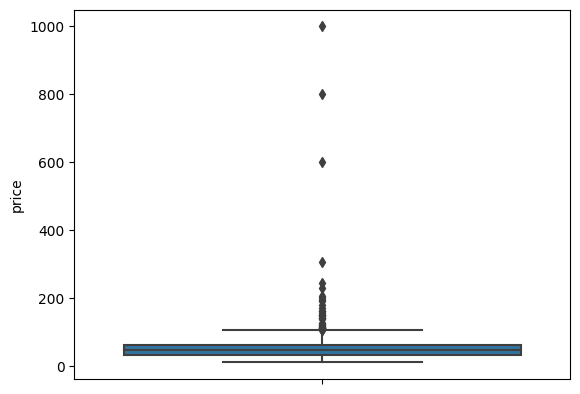

In [25]:
sns.boxplot(df,y=df1.price)

In [26]:
df1[df1.price>400]

,id,listing_url,name,host_since,host_is_superhost,neighbourhood,accommodates,amenities,price,number_of_reviews,review_scores_rating,latitude,longitude
173,9872147,https://www.airbnb.com/rooms/9872147,Loft in Riga · ★4.74 · 1 bedroom · 1 bed · 1.5...,2015-12-08,f,"Riga, Latvia",2,"[""Host greets you"", ""Smoke alarm"", ""Kitchen"", ...",800.0,24,4.74,56.96065,24.14961
376,19065190,https://www.airbnb.com/rooms/19065190,Rental unit in Riga · ★4.83 · 1 bedroom · 2 be...,2017-06-02,NaN,"Riga, Centr, Latvia",1,"[""Host greets you"", ""Smoke alarm"", ""Kitchen"", ...",1000.0,18,4.83,56.97259,24.12305
1418,47763911,https://www.airbnb.com/rooms/47763911,Condo in Riga · ★4.86 · 1 bedroom · 1 bath,2017-08-29,f,NaN,2,"[""Security cameras on property"", ""Smoke alarm""...",600.0,7,4.86,56.96786,24.15023


In [27]:
df1.shape

(907, 13)

In [28]:
# There are a total 3 listings with the wrong price or unavailable
# After verifying each listing url, dropping all 3 to avoid skewness in the price and alter dataframe
df1=df1[df1['price']<=400]

In [29]:
#Final dataset size
df1.shape

(904, 13)

In [30]:
len(df)

2358

In [ ]:
len(df1)

904

In [31]:
# Percentage of listings that accomodates<=2
len(df1)/len(df)

0.3833757421543681

# Data manipulation

In [32]:
df1.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude'],
      dtype='object')

###host_since

In [33]:
# Let's check what type of info we have
# Info gives details of each column's datatype like int, float, or string
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 2745
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    904 non-null    int64  
 1   listing_url           904 non-null    object 
 2   name                  904 non-null    object 
 3   host_since            904 non-null    object 
 4   host_is_superhost     821 non-null    object 
 5   neighbourhood         510 non-null    object 
 6   accommodates          904 non-null    int64  
 7   amenities             904 non-null    object 
 8   price                 904 non-null    float64
 9   number_of_reviews     904 non-null    int64  
 10  review_scores_rating  904 non-null    float64
 11  latitude              904 non-null    float64
 12  longitude             904 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 98.9+ KB


In [35]:
# Let's find the experience of host
df1.host_since

0       2010-02-12
5       2011-12-27
9       2011-05-19
15      2012-04-25
19      2012-08-13
           ...    
2723    2016-01-02
2734    2016-01-02
2735    2018-11-26
2742    2018-06-04
2745    2019-10-25
Name: host_since, Length: 904, dtype: object

In [36]:
# Let's change the datatype from object to datetime
from datetime import datetime as dt
df1.host_since=pd.to_datetime(df1.host_since)
df1.host_since.dt.year


0       2010
5       2011
9       2011
15      2012
19      2012
        ... 
2723    2016
2734    2016
2735    2018
2742    2018
2745    2019
Name: host_since, Length: 904, dtype: int64

In [38]:
# Now datetype is changed to float
# Create new column to verify no:of years of experience
df1['host_exp']=dt.today().year-df1.host_since.dt.year
df1.host_exp

0       13
5       12
9       12
15      11
19      11
        ..
2723     7
2734     7
2735     5
2742     5
2745     4
Name: host_exp, Length: 904, dtype: int64

In [39]:
# Verify if new column is added to the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 2745
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    904 non-null    int64         
 1   listing_url           904 non-null    object        
 2   name                  904 non-null    object        
 3   host_since            904 non-null    datetime64[ns]
 4   host_is_superhost     821 non-null    object        
 5   neighbourhood         510 non-null    object        
 6   accommodates          904 non-null    int64         
 7   amenities             904 non-null    object        
 8   price                 904 non-null    float64       
 9   number_of_reviews     904 non-null    int64         
 10  review_scores_rating  904 non-null    float64       
 11  latitude              904 non-null    float64       
 12  longitude             904 non-null    float64       
 13  host_exp           

In [40]:
df1.host_exp.describe()

count    904.000000
mean       5.776549
std        2.949344
min        0.000000
25%        4.000000
50%        5.000000
75%        8.000000
max       14.000000
Name: host_exp, dtype: float64

##host_is_superhost

In [41]:
df1.isna().sum()

id                        0
listing_url               0
name                      0
host_since                0
host_is_superhost        83
neighbourhood           394
accommodates              0
amenities                 0
price                     0
number_of_reviews         0
review_scores_rating      0
latitude                  0
longitude                 0
host_exp                  0
dtype: int64

In [42]:
# Checking unique values in this column including missing values
df1.host_is_superhost.value_counts(dropna=False)

f      456
t      365
NaN     83
Name: host_is_superhost, dtype: int64

In [43]:
# Since there are lot of missing values in this column
# Let's assume missing values as f
df1.host_is_superhost.fillna("f",inplace=True)

In [44]:
df1.host_is_superhost.value_counts()

f    539
t    365
Name: host_is_superhost, dtype: int64

In [45]:
# Alter f or t (strings) to 0 or 1 (integers)
df1['host_is_superhost']=df1.host_is_superhost.replace({'f':0, 't':1})

In [46]:
df1.host_is_superhost.value_counts()

0    539
1    365
Name: host_is_superhost, dtype: int64

In [47]:
# Finding % of listings with super-host status
value_counts = df1['host_is_superhost'].value_counts()
(value_counts[1] / value_counts.sum()) * 100




40.376106194690266

##price

In [48]:
df1.price.describe()

count    904.000000
mean      51.090708
std       28.493915
min       10.000000
25%       33.000000
50%       45.000000
75%       61.000000
max      307.000000
Name: price, dtype: float64

<Axes: xlabel='price'>

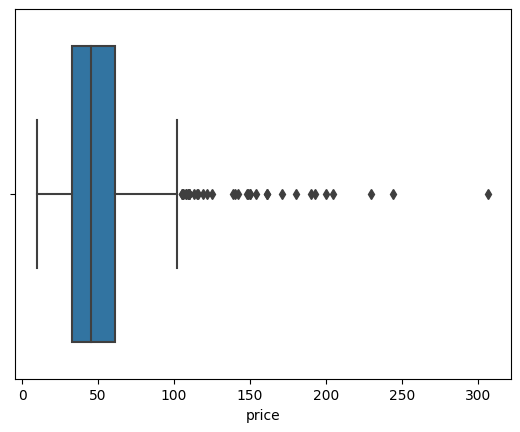

In [49]:
# Plotting outliers using boxplot (imported Seaborn already)
sns.boxplot(data=df1,x='price')

In [50]:
# Anything less than -59 (which is impossible) or anything above 205 are considered as outliers by this method.
# However, this is just for our reference, we are not deleting outliers based on boxplot!
# Although in real world, price per night could be more than 205, based on our assumption that digital nomads make $85k yearly income, its highly unlikely that they are willing to pay more than 205 per night'''

<Axes: xlabel='price', ylabel='Count'>

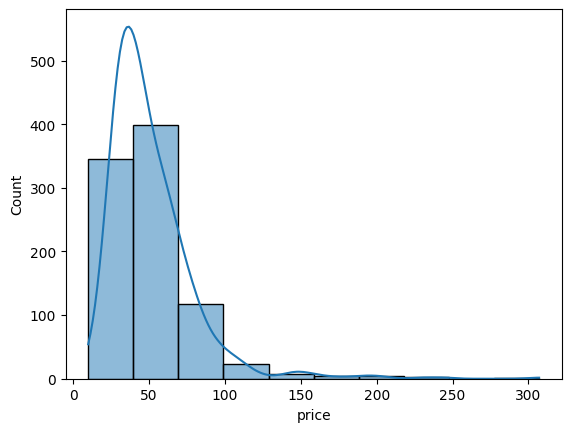

In [51]:
sns.histplot(data=df1.price, bins=10, kde=True)

In [52]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(df,column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

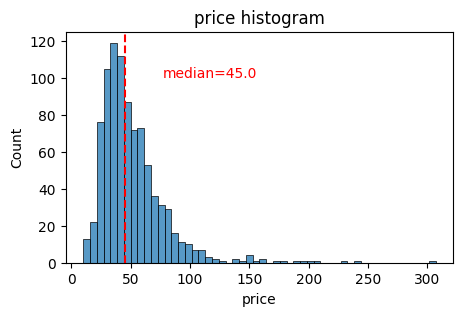

In [53]:
histogrammer(df1,'price', median_text=True)

##Amenities

In [54]:
# Creating new column for wifi
df1['wifi']=(df1.amenities.str.contains('Wifi', case=False))

In [55]:
df1['wifi'].sum()/df1.shape[0]

0.9789823008849557

In [56]:
# Creating new column for workspace
df1['workspace']=(df1.amenities.str.contains('workspace', case=False))
df1['workspace'].sum()/df1.shape[0]

0.5221238938053098

##Coworking Place Data

In [58]:
path = "/content/modified_coordinates.csv"
cwp = pd.read_csv(path)

In [59]:
cwp.sample(5)
# Dataset includes data for all the cities

,city,name,adress,Google Plus-Code,longitude,latitude
112,Barcelona,Cowork Rambla Catalunya - Coworking Barcelona,"Carrer Corsega, num. 284, 1 Pis, 08008 Barcelo...","95V4+RR Barcelona, Spanien",4139453,2157116
125,Barcelona,CREC Coworking Gràcia - Depot Lab Barcelona,"Carrer de Joaquim Ruyra, 9, 11, 08025 Barcelon...","C547+9G Barcelona, Spanien",4140594,2163867
168,Barcelona,Cloudworks Sant Antoni,"C/ del Comte Borrell, 62, 08015 Barcelona, Spa...","95H6+H7 Barcelona, Spanien",4137892,2160753
113,Barcelona,Sowo Coworking Barcelona,"C/ del Consell de Cent, 413, 415, Principal 2ª...","95WC+8M Barcelona, Spanien",4139584,2171729
210,Barcelona,La Lola Coworking,"Carrer de Sant Salvador, 109, 08024 Barcelona,...","C554+89 Barcelona, Spanien",4140838,2155860


In [63]:
# Filtering cwp data for Riga and rename as cwp_bar
# and dropping useless columns
# and setting index with name column
cwp_riga=cwp[cwp.city=='Riga'].drop(['city', 'Google Plus-Code', 'adress'], axis=1).set_index('name')

In [61]:
# Number of coworking places in Riga=17
cwp_riga

,longitude,latitude
name,,
TechHub Riga,5694995,2412161
Mill Riga,5696434,2413481
Workland Telegraph,5694708,2411300
Coworking Riga,5696124,2413547
Techhub Riga,5694996,2412167
OraculeTang Space,5694931,2410388
Double9 coworking,5696509,2413011
DarbaVieta,5696341,2410390
croworking,5695736,2414741


In [65]:
cwp_riga.longitude.dtype
cwp_riga.latitude.dtype

dtype('int64')

In [66]:
# Adjusting longitude and latitude in valid format
cwp_riga.longitude=cwp_riga.longitude/100000
cwp_riga.latitude=cwp_riga.latitude/100000

In [67]:
# Create a dictionnary dict_cwp for easy iteration
dict_cwp={cwp_riga.index.tolist()[i] :(cwp_riga.longitude.tolist()[i],cwp_riga.latitude.tolist()[i]) for i in range(len(cwp_riga.index.tolist()))}

In [68]:
dict_cwp

{'TechHub Riga': (56.94995, 24.12161),
 'Mill Riga': (56.96434, 24.13481),
 'Workland Telegraph': (56.94708, 24.113),
 'Coworking Riga': (56.96124, 24.13547),
 'Techhub Riga': (56.94996, 24.12167),
 'OraculeTang Space': (56.94931, 24.10388),
 'Double9 coworking': (56.96509, 24.13011),
 'DarbaVieta': (56.96341, 24.1039),
 'croworking': (56.95736, 24.14741),
 'LU Student Business Inkubator Co-Working Space': (56.94779, 24.1151),
 'Regus - Riga, Terbatas': (56.95367, 24.1215),
 'Regus - Riga, Esplanade': (56.95589, 24.11854),
 'Beauty Works coworking': (56.95654, 24.13409),
 'Regus - Riga Opera': (56.94998, 24.11212),
 'Magnēts Coworking': (56.93581, 24.06924),
 'Hamann Coworking': (56.95055, 24.06517),
 'Teikums': (56.97692, 24.16626)}

In [73]:
'''In the 3 following code lines we prepare functions for calculating distance from each listing to coworkingspace'''

'In the 3 following code lines we prepare functions for calculating distance from each listing to coworkingspace'

In [74]:
import math

def distance(origin, destination):
    """
    Calculate the Haversine distance used for calculation between our dataset entries and coworking places.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [75]:
def get_minimal_distance_from_coworking_place(l,L):
    """
    Get the minimal distance from co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv
    l for longitude
    L for latitude
    Result in km rounded with 3 digits
    """
    origin=(l,L)
    min_dist=""
    for cwp in dict_cwp:
        if min_dist=="":
            min_dist=distance(origin, dict_cwp[cwp])
            continue
        if min_dist<distance(origin, dict_cwp[cwp]):
            continue
        else:
            min_dist=distance(origin, dict_cwp[cwp])
    return round(min_dist,3)


In [76]:
def get_number_of_coworking_place_less_than_n_km(l,L,n):
    """
    Get the number of co-working place listed in the dictionnary dict_cwp build on 'modified_coordinates.csv'
    within a radius of n kilometers
    l for longitude
    L for latitude
    n : float : lenght of radius within to check the number of co-working place
    Result is integer
    """
    origin=(l,L)
    count=0
    for cwp in dict_cwp:
        if distance(origin, dict_cwp[cwp])<=n:
            count+=1
    return count

In [77]:
# Finding the distance between each listing to the nearest cwp
df1['distance']=df1.apply(lambda x: get_minimal_distance_from_coworking_place(x.latitude,x.longitude), axis=1)

In [78]:
df1.distance

0       0.440
5       4.704
9       0.072
15      1.142
19      0.466
        ...  
2723    0.608
2734    0.594
2735    0.968
2742    0.978
2745    0.309
Name: distance, Length: 904, dtype: float64

In [79]:
# 75%of listings are < 500m away from a cwp
# Any listing with distance <= 500m is considered as attractive
df1.distance.describe()

count    904.000000
mean       0.760442
std        1.230812
min        0.006000
25%        0.195500
50%        0.379000
75%        0.810250
max       11.646000
Name: distance, dtype: float64

In [80]:
df1['count_of_cwp_0.5km']=df1.apply(lambda x: get_number_of_coworking_place_less_than_n_km(x.latitude,x.longitude,0.5), axis=1)

##Reviews

In [81]:
# Since we already deleted listings with 0 reviews
df1.number_of_reviews.describe()

count    904.000000
mean      45.564159
std       73.358721
min        1.000000
25%        5.000000
50%       18.000000
75%       52.000000
max      556.000000
Name: number_of_reviews, dtype: float64

In [82]:
df1.review_scores_rating.describe()

count    904.000000
mean       4.776117
std        0.353148
min        1.000000
25%        4.700000
50%        4.860000
75%        5.000000
max        5.000000
Name: review_scores_rating, dtype: float64

#Scoring


In [83]:
df1.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
       'host_exp', 'wifi', 'workspace', 'distance', 'count_of_cwp_0.5km'],
      dtype='object')

In [84]:
columns=['price','host_exp','review_scores_rating','distance']

In [85]:
import numpy as np

In [86]:
quantiles = np.linspace(0.2, 1, 5)
quantiles

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [87]:
df_threshold = df1[columns].quantile(quantiles)
df_threshold = df_threshold.reset_index(drop = True)
df_threshold

,price,host_exp,review_scores_rating,distance
0,30.0,4.0,4.670,0.1706
1,40.0,5.0,4.820,0.2780
2,50.0,7.0,4.918,0.5080
3,67.0,9.0,5.000,0.9604
4,307.0,14.0,5.000,11.6460


In [88]:
def calc_attractiveness(
        data: pd.DataFrame,
        df_threshold: pd.DataFrame,
    ) -> pd.Series:

    for column in df_threshold.columns:
        for idx, threshold in enumerate(df_threshold[column]):
            if idx == 0:
                boolean_series = data[column] <= threshold
            else:
                boolean_series = data[column].between(
                    df_threshold.loc[idx-1, column],
                    df_threshold.loc[idx, column]
                )

            if f'{column}_Score' not in data.columns:
                data[f'{column}_Score'] = 8 # placeholder to create column
            data.loc[boolean_series, f'{column}_Score'] = idx + 1

    return data

In [89]:
# Create new df 'result'
result = calc_attractiveness(df1, df_threshold)

In [90]:
result.describe()

,id,host_is_superhost,accommodates,price,number_of_reviews,review_scores_rating,latitude,longitude,host_exp,distance,count_of_cwp_0.5km,price_Score,host_exp_Score,review_scores_rating_Score,distance_Score
count,9.040000e+02,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,2.828624e+17,0.403761,1.926991,51.090708,45.564159,4.776117,56.954006,24.123945,5.776549,0.760442,1.502212,3.071903,3.080752,3.075221,3.003319
std,3.656926e+17,0.490922,0.260295,28.493915,73.358721,0.353148,0.015208,0.028219,2.949344,1.230812,1.597338,1.367365,1.394144,1.481852,1.415384
min,2.113400e+04,0.000000,1.000000,10.000000,1.000000,1.000000,56.899390,23.992580,0.000000,0.006000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3.217335e+07,0.000000,2.000000,33.000000,5.000000,4.700000,56.948837,24.110023,4.000000,0.195500,0.000000,2.000000,2.000000,2.000000,2.000000
50%,4.872482e+07,0.000000,2.000000,45.000000,18.000000,4.860000,56.952065,24.124020,5.000000,0.379000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,6.755762e+17,1.000000,2.000000,61.000000,52.000000,5.000000,56.957583,24.139105,8.000000,0.810250,3.000000,4.000000,4.000000,5.000000,4.000000
max,9.120969e+17,1.000000,2.000000,307.000000,556.000000,5.000000,57.074460,24.250110,14.000000,11.646000,6.000000,5.000000,5.000000,5.000000,5.000000


In [91]:
result.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
       'host_exp', 'wifi', 'workspace', 'distance', 'count_of_cwp_0.5km',
       'price_Score', 'host_exp_Score', 'review_scores_rating_Score',
       'distance_Score'],
      dtype='object')

In [92]:
reverse_price_quantile = result['price_Score'].map(lambda x: 5 - (x - 1))

In [93]:
reverse_distance_quantile = result['distance_Score'].map(lambda x: 5 - (x - 1))

In [94]:
reverse_distance_quantile

0       3
5       1
9       5
15      1
19      3
       ..
2723    2
2734    2
2735    1
2742    1
2745    3
Name: distance_Score, Length: 904, dtype: int64

In [95]:
result['final score'] = 0.5 * reverse_price_quantile + 0.25 * result['review_scores_rating_Score'] + 0.15 * reverse_distance_quantile + 0.1 * result['host_exp_Score']

In [96]:
result['final score'] = 0.5 * reverse_price_quantile +  0.1 * result['host_exp_Score'] + 0.15 * result['review_scores_rating']
result['final score'].describe()

count    904.000000
mean       2.488541
std        0.687089
min        0.950000
25%        1.915125
50%        2.501250
75%        3.069375
max        3.750000
Name: final score, dtype: float64

In [97]:
df1.neighbourhood.value_counts(dropna=False)

Riga, Latvia                508
NaN                         394
Riga, State Riga, Latvia      1
Vecriga, Latvia               1
Name: neighbourhood, dtype: int64

In [98]:
result.groupby(['neighbourhood'])['final score'].agg(['min','mean','median','max']).style.background_gradient()

,min,mean,median,max
neighbourhood,,,,
"Riga, Latvia",1.200000,2.443602,2.430500,3.750000
"Riga, State Riga, Latvia",2.017000,2.017000,2.017000,2.017000
"Vecriga, Latvia",2.442500,2.442500,2.442500,2.442500


In [99]:
df1.columns

Index(['id', 'listing_url', 'name', 'host_since', 'host_is_superhost',
       'neighbourhood', 'accommodates', 'amenities', 'price',
       'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude',
       'host_exp', 'wifi', 'workspace', 'distance', 'count_of_cwp_0.5km',
       'price_Score', 'host_exp_Score', 'review_scores_rating_Score',
       'distance_Score', 'final score'],
      dtype='object')

In [100]:
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig = ff.create_hexbin_mapbox(
    data_frame=result, lat="latitude", lon="longitude",width=1000, height=800,
    nx_hexagon=30, opacity=0.6, min_count=1,color='final score',agg_func=np.mean,
    color_continuous_scale="matter",
    labels={"color":"Score"},
    show_original_data=False,
    original_data_marker=dict(size=4, opacity=0.6, color="blue"))


fig.update_layout(mapbox_style="open-street-map")

fig.show()

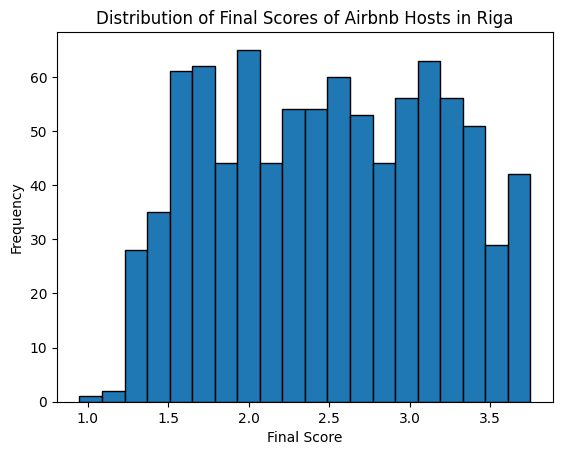

In [101]:
final_scores = result['final score']
plt.hist(final_scores, bins=20, edgecolor='k')  # Du kannst die Anzahl der Bins anpassen
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.title('Distribution of Final Scores of Airbnb Hosts in Riga')
plt.show()






